In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

# Exercise 4 - Logistc regression

x = np.genfromtxt('ex4x.dat')
y = np.genfromtxt('ex4y.dat')
y = np.expand_dims(y, axis=1)

# Add intercept term to x

x = np.insert(x, 0, 1, 1)

x = np.matrix(x)
y = np.matrix(y)

# Get positive and negatives
pos = np.where(y==1)
neg = np.where(y==0)

# Plot the training data
# Use different markers for positives and negatives

(m, n) = np.shape(x)

theta = np.zeros(n)
theta = np.expand_dims(theta, axis=1)

In [2]:
sigmoid = lambda a: 1 / (1 + math.exp(-a))

# Vectorize sigmoid so it can operate on whole matrix
vecsig = np.vectorize(sigmoid)

max_itr = 7
j = np.zeros(max_itr)

for i in range(max_itr):
    # Calculate the hypothesis function
    z = x.dot(theta)
    h = vecsig(z)
    h = np.array(h)

    # Calculate the gradient and hessian
    # The implementation below is equivalent to the summation formulas
    grad = x.transpose().dot(h - y) / m
    hes = x.transpose().dot( np.diag(h[:,0]) ).dot( np.diag(1 - h[:,0]) ).dot(x) / m
    
    # Update theta
    theta = theta - np.linalg.lstsq(hes, grad)[0]
    
theta


matrix([[-16.37874341],
        [  0.14834077],
        [  0.15890845]])

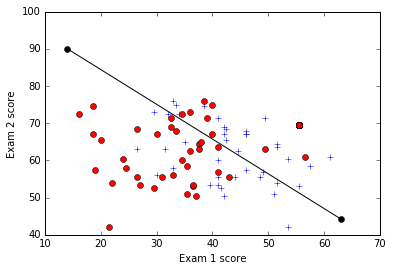

([], [])

In [65]:
plot_x = np.matrix([min(x[:,1] - 2).item(0), max(x[:,1] + 2).item(0)])

plot_y = np.multiply((-1 / theta[2]), ( np.multiply(theta[1], plot_x) + theta[0] ))

plt.plot(x[pos, 1], x[neg, 2], 'b+')
plt.plot(x[neg, 1], x[neg, 2], 'ro')

plt.plot(plot_x.A1, plot_y.A1, 'ko-')

plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')

plt.show()

[<matplotlib.lines.Line2D object at 0x7f9fdf714750>, <matplotlib.lines.Line2D object at 0x7f9fdf714f90>, <matplotlib.lines.Line2D object at 0x7f9fdfb9bf10>, <matplotlib.lines.Line2D object at 0x7f9fdfb9b110>] [u'1 data', u'2 data', u'3 data', u'4 data']


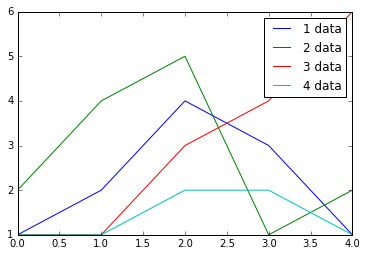

In [41]:
dct = {'list_1' : [1,2,4,3,1],'list_2' : [2,4,5,1,2],
       'list_3' : [1,1,3,4,6],'list_4' : [1,1,2,2,1]}

xs = [0,1,2,3,4]

lines = []    
for i in range(1,5):
    lines += plt.plot(xs,dct['list_%s' %i], label="{} data".format(i))
    
labels = [l.get_label() for l in lines]
plt.legend(lines, labels)
print lines, labels
plt.show()